In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning Dataframe</h1>

In [156]:
df = pd.read_csv('CSV_Files/Raw_House_details.csv')
#df.to_csv('CSV_Files/Raw_House_details.csv', index=False)

Get the lay of the land of the Dataframe

In [14]:
df.nunique()

Type of property                25
Location                      1561
postal code                    929
immo code                     8570
Price                         1357
Address                       1762
Bedrooms                        24
Energy class                    13
Primary energy consumption    1001
Furnished                        2
Terrace                          2
Terrace surface                128
Surface of the plot           1649
Living room surface            105
Number of frontages              9
Construction year              164
Building condition               7
Outdoor parking space            1
Bathrooms                       14
Shower rooms                    16
Office                           2
Toilets                         16
Kitchen type                     9
Heating type                     8
province                        11
dtype: int64

In [15]:
df.shape

(8570, 25)

In [16]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,0,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,1988,Good,0,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,As new,0,1,0,0,0,Installed,0,Antwerp


Remove any missing values, strings and characters in the Price column that do not show sheer numeric value

In [17]:

df =df.replace({'€':'','\€':'','\)':'','\.':''},regex=True) 

In [18]:

df = df[df['Price'].notnull() & (df['Price'] != '')]

In [19]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

Replace any 'yes' or 'no' with binary numbers

In [20]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

Remove the Outdoor parking space as the only result was 0

In [21]:
df =df.drop('Outdoor parking space', axis=1) 

In [22]:
round(df['Price'].describe())

count        8570.0
mean       464969.0
std       1011255.0
min            16.0
25%        239000.0
50%        335000.0
75%        479000.0
max      43900000.0
Name: Price, dtype: float64

In [23]:
df.shape

(8570, 24)

In [24]:
df = df.drop(df['Price'].nlargest(10).index)

In [25]:
df = df.drop(df['Price'].nsmallest(100).index)

In [26]:
df['Price'].min()

25000.0

In [27]:
df.shape

(8460, 24)

In [28]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [29]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [30]:
df.sort_values(by='Price',ascending=False).head()  # not df.head() as it will only give the first view of teh dataframe and that is then sorted

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
2983,house,knokke-zoute,8300,10658623,6495000.0,Kustlaan 277,5,B,125.0,0,...,4,2008,As new,4,0,1,5,Hyper equipped,Gas,West Flanders
8398,exceptional-property,knokke-heist,8300,10643422,6385000.0,Albert plein 10,4,D,357.0,0,...,4,0,Good,4,4,1,0,Installed,Fuel oil,West Flanders
4474,villa,knokke,8300,10654776,5850000.0,Dumortierlaan 89,7,NS,0.0,0,...,0,0,0,6,0,0,0,0,0,West Flanders
2381,house,knokke-heist,8300,10660118,5650000.0,Albert plein 10,6,A,74.0,0,...,4,2020,As new,3,2,0,3,USA hyper equipped,0,West Flanders
2984,house,knokke-heist,8300,10658622,5650000.0,Kustlaan 277,6,A,74.0,0,...,4,2020,As new,3,0,0,4,Hyper equipped,Gas,West Flanders


Inspect how many missing values are there in the dataframe

In [31]:
df.isnull().sum()

Type of property                0
Location                        0
postal code                     0
immo code                       0
Price                           0
Address                         0
Bedrooms                        0
Energy class                    0
Primary energy consumption      0
Furnished                       0
Terrace                         0
Terrace surface                 0
Surface of the plot             0
Living room surface             0
Number of frontages             0
Construction year               0
Building condition              0
Bathrooms                       0
Shower rooms                    0
Office                          0
Toilets                         0
Kitchen type                    0
Heating type                    0
province                      158
dtype: int64

In [32]:
#df = df[df.iloc[:, -1].astype(str).str.strip() != '']

df.dropna(subset=['province'], inplace=True)  # dropping missing values in column province

In [33]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       0
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [34]:
#df.to_csv('CSV_Files/House_details.csv', index=False)

In [62]:

df['Energy class'] = df['Energy class'].replace(['NS','G_F','C_B','G_A++','G'],0)
df['Energy class'] = df['Energy class'].replace('A++','A+')
df['Energy class'].unique()

array(['D', 'C', 0, 'E', 'F', 'B', 'A', 'A+'], dtype=object)

In [71]:
df['Province']=df['province'].replace('Province')

In [126]:
df['Province']=df['Province'].replace(['Luxembourg (shared with Eastern Hainaut','Brussels Capital Region','Hainaut'],['Luxembourg','Brussels','Henegouwen'])
df['Province'].unique()

array(['Antwerp', 'Walloon Brabant', 'Luxembourg', 'East Flanders',
       'Liège', 'Flemish Brabant', 'Brussels', 'Limburg', 'Henegouwen',
       'West Flanders', 'Namur'], dtype=object)

<h1>Visualisation</h1>

**What is the correlation between the corresponding variables?**

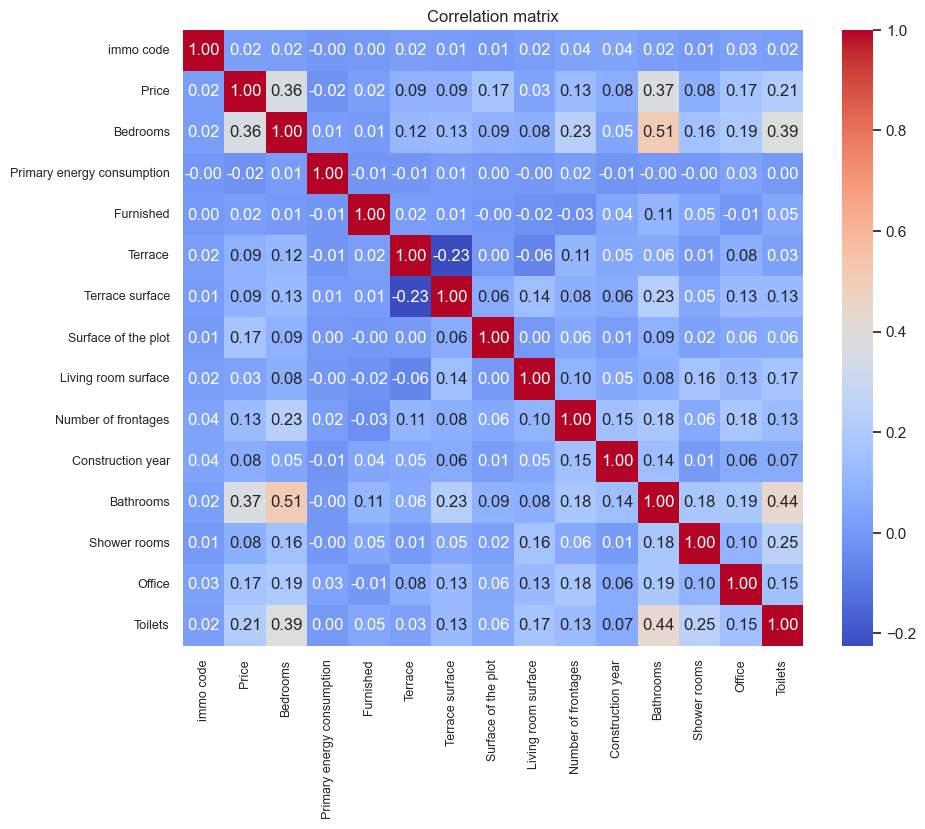

In [63]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

**Provide a scatterplot between the price and construction year**

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

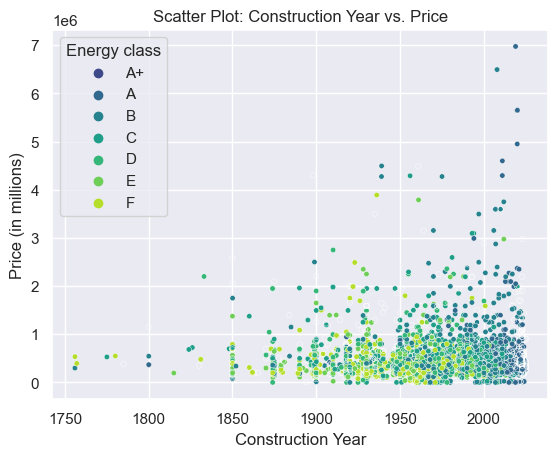

In [201]:



filtered_Construction_df = df[df['Construction year'] != 0]
filtered_Energy_df = df[df['Energy class'] != 0]


years = filtered_Construction_df['Construction year']
prices = df['Price']
categories = filtered_Energy_df['Energy class']


size = np.random.uniform(low=-0.1, high=0.1, size=len(years))
size_years = years + size

energy_order = ['A+', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

sns.scatterplot(x=size_years, y=prices, hue=categories, palette='viridis', s=15, hue_order=energy_order)


plt.xlabel('Construction Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Construction Year vs. Price')

plt.colorbar(label='Energy class')

# Display the plot
plt.show()



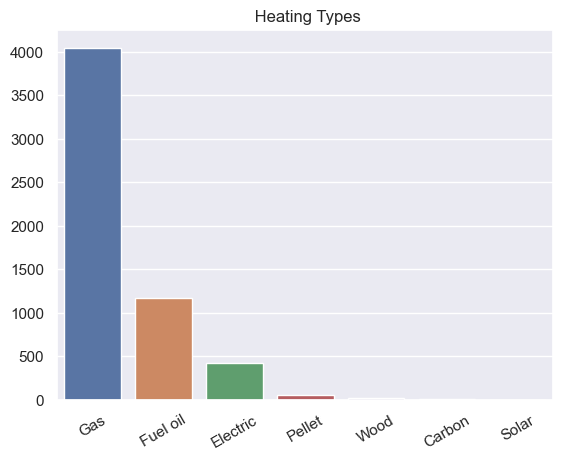

In [182]:


filtered_Heating_df = df[df['Heating type'] != '0']

filtered_Heating_df_order = ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Wood', 'Carbon', 'Solar']

sns.countplot(data= filtered_Heating_df, x='Heating type',order=filtered_Heating_df_order)

plt.xticks(rotation=30) 
plt.xlabel('')
plt.ylabel('')
plt.title(' Heating Types')
plt.show()




In [166]:
df.loc[df['Heating type']=='Wood']

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
971,manor-house,nothomb,6717,10664653,349000.0,Rue des Etangs 28,2,G,651.0,0,...,0,To renovate,0,1,0,0,1,0,Wood,Luxembourg (shared with Eastern Hainaut)
1652,house,floreffe,5150,10662927,159000.0,"Chaussée Nationale 4, b 21",5,F,456.0,0,...,0,To renovate,0,1,0,0,2,Semi equipped,Wood,Namur
1981,house,seraing,4100,10552511,90000.0,Rue des Fories 2,2,F,498.0,0,...,0,To renovate,0,1,0,0,1,0,Wood,Liège
1985,house,zwalm,9630,10661800,475000.0,Stationsstraat 76,3,D,398.0,0,...,1996,Good,0,1,0,0,1,0,Wood,East Flanders
2087,house,sint-niklaas,9111,10661460,275000.0,Gentse Baan 45A,2,D,321.0,0,...,1977,Good,0,1,0,1,0,Hyper equipped,Wood,East Flanders
2427,apartment-block,seneffe,7180,10660014,990000.0,Place Emile Delalieux 1,10,NS,0.0,0,...,0,Good,0,7,7,0,7,Semi equipped,Wood,Hainaut (West)
2887,house,vichte,8570,10658949,174000.0,Vichteplaats 13,2,F,1365.0,0,...,0,To renovate,0,1,0,0,0,0,Wood,West Flanders
3564,house,hulshout,2235,10656944,199000.0,Theofiel De Biestraat 11,1,E,459.0,0,...,2013,Good,0,0,0,0,1,Not installed,Wood,Antwerp
3969,house,kessel,2560,10655956,250000.0,Dorpsstraat 34 Bus 1,3,NS,0.0,0,...,1900,To be done up,0,1,0,0,0,0,Wood,Antwerp
4016,apartment,xilokastro,204%2000,10655882,130000.0,Rue de Wynants 9,3,NS,0.0,1,...,1982,Good,0,1,0,0,0,0,Wood,NaN


In [106]:
df['Type of property'].unique()


array(['house', 'apartment', 'villa', 'mixed-use-building', 'duplex',
       'service-flat', 'exceptional-property',
       'new-real-estate-project-houses', 'triplex', 'apartment-block',
       'other-property', 'country-cottage', 'loft', 'mansion',
       'town-house', 'new-real-estate-project-apartments', 'ground-floor',
       'penthouse', 'bungalow', 'kot', 'farmhouse', 'flat-studio',
       'chalet', 'manor-house', 'castle'], dtype=object)

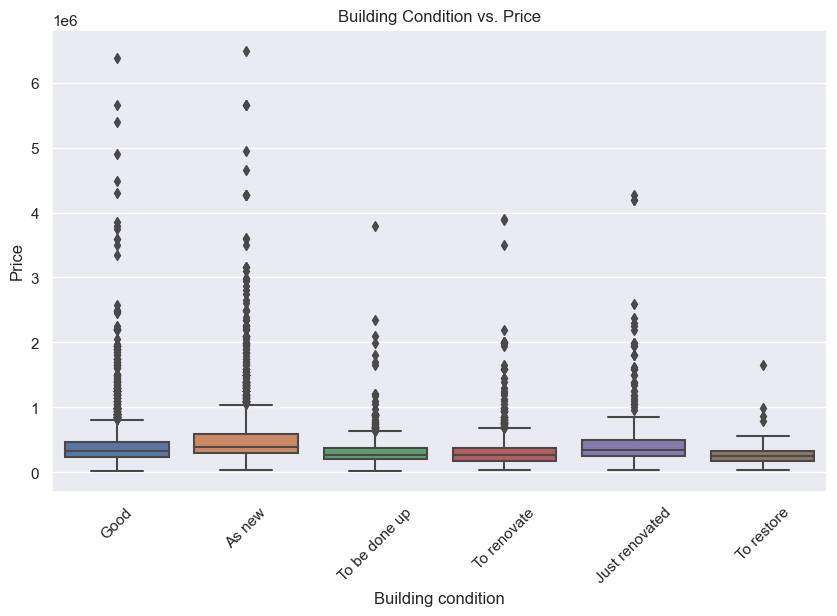

In [121]:
filtered_Building_df = df[df['Building condition'] != '0']

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_Building_df, x='Building condition', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Building condition')
plt.ylabel('Price')
plt.title('Building Condition vs. Price')
plt.show()


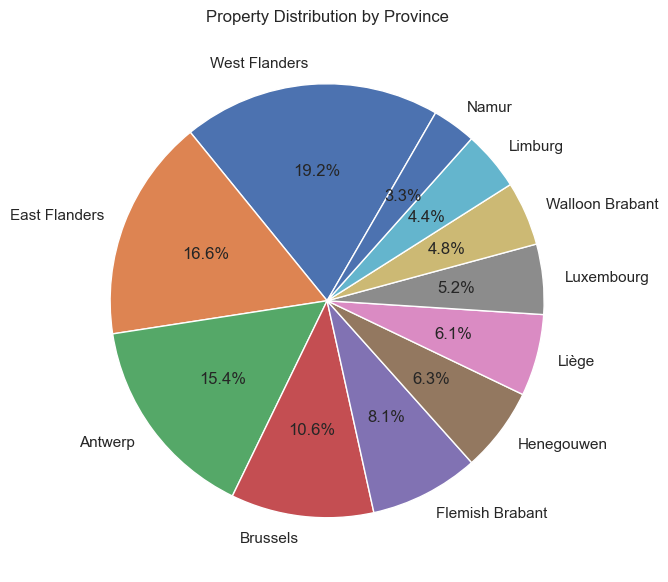

In [137]:
province_counts = df['Province'].value_counts()

plt.figure(figsize=(7, 8)) 
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%', startangle=60)
plt.title('Property Distribution by Province')
plt.show()


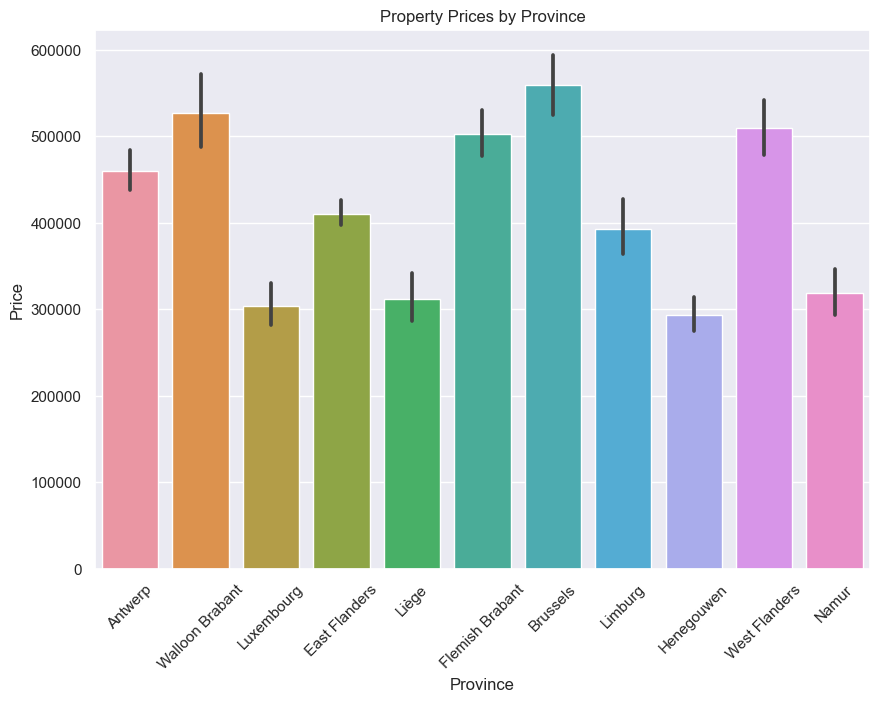

In [140]:

plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='Province', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Property Prices by Province')
plt.show()


In [149]:
print(df.dtypes)

Type of property               object
Location                       object
postal code                    object
immo code                       int64
Price                         float64
Address                        object
Bedrooms                        int64
Energy class                   object
Primary energy consumption    float64
Furnished                       int64
Terrace                         int64
Terrace surface                 int64
Surface of the plot             int64
Living room surface             int64
Number of frontages             int64
Construction year               int64
Building condition             object
Bathrooms                       int64
Shower rooms                    int64
Office                          int64
Toilets                         int64
Kitchen type                   object
Heating type                   object
province                       object
Province                       object
dtype: object


In [150]:
df['Energy class'] = df['Energy class'].astype(str)


<Figure size 800x800 with 0 Axes>

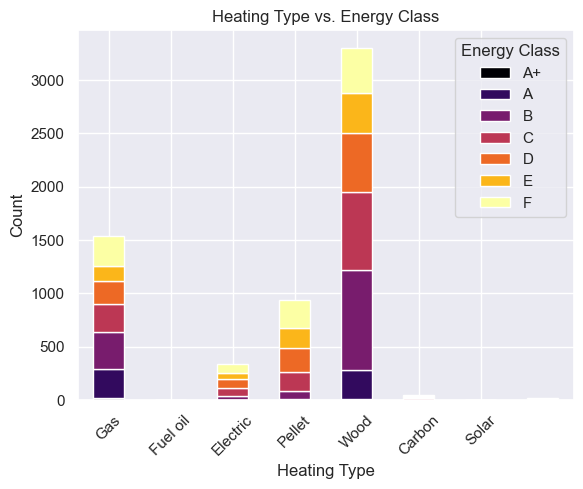

In [227]:

filtered_Energy_df = df[df['Energy class'] != '0']
filtered_Heating_df = df[df['Heating type'] != '0']

plt.figure(figsize=(8, 8))
grouped_df = df.groupby(['Heating type', 'Energy class']).size().unstack(fill_value=0)


grouped_df[energy_order].plot(kind='bar', stacked=True, colormap='inferno')


heating_order = ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Wood', 'Carbon', 'Solar']
energy_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']
#plt.figure(figsize=(8, 8))
plt.xticks(range(len(heating_order)),heating_order, rotation=45)


plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.title('Heating Type vs. Energy Class')

plt.legend(title='Energy Class')

plt.show()


In [213]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,0,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,1988,Good,0,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,As new,0,1,0,0,0,Installed,0,Antwerp
